In [153]:
library(DESeq2)
library(limma)
library(rtracklayer)
library(tidyverse)
library(pheatmap)
# library(BSgenome.Mmusculus.UCSC.mm10)
library(cowplot)
library(ComplexHeatmap)
library(stringr)
library(msigdbr)
library(tidyr)



library(circlize)




circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [102]:
# qstem score used in https://www.nature.com/articles/s41590-022-01171-9#MOESM4
# positive and negative association
qstem_p <- as.vector(as.matrix(read.table(file.path("/net/shendure/vol8/projects/scifate_abadiek/Tcf7_genomics/Tcf7_RNA_analysis/gene_lists", "qstem_pos.txt"))))
qstem_n <- as.vector(as.matrix(read.table(file.path("/net/shendure/vol8/projects/scifate_abadiek/Tcf7_genomics/Tcf7_RNA_analysis/gene_lists", "qstem_neg.txt"))))
gs_names <-  as.vector(as.matrix(read.table(file.path("/net/shendure/vol8/projects/scifate_abadiek/Tcf7_genomics/Tcf7_RNA_analysis/gene_lists", "msigdbr_gs_name.txt"))))
gs_names_gsea <- as.vector(as.matrix(read.table(file.path("/net/shendure/vol8/projects/scifate_abadiek/Tcf7_genomics/Tcf7_RNA_analysis/gene_lists", "msigdbr_gs_name_gsea.txt"))))

# msigdbr
# get gene lists
msig_df <- msigdbr(species = "Mus musculus", category = "C7")
msig_df <- msig_df[which(msig_df$gs_name %in% gs_names), ]
# msig_df <- msig_df[grep("UP", msig_df$gs_name ), ]

# Eff vs mem
msig_df_GR_EFFvMEM_UP <- msig_df[grep("GOLDRATH_EFF_VS_MEMORY_CD8_TCELL_UP", msig_df$gs_name ), ] # Goldrath 
msig_df_GR_EFFvMEM_DN <- msig_df[grep("GOLDRATH_EFF_VS_MEMORY_CD8_TCELL_DN", msig_df$gs_name ), ] # Goldrath 
msig_df_SK_D8_EFFvMEM_UP <- msig_df[grep("KAECH_DAY8_EFF_VS_MEMORY_CD8_TCELL_UP", msig_df$gs_name ), ] #Kaech D8
msig_df_SK_D8_EFFvMEM_DN <- msig_df[grep("KAECH_DAY8_EFF_VS_MEMORY_CD8_TCELL_DN", msig_df$gs_name ), ] #Kaech D8
msig_df_SK_D15_EFFvMEM_UP <- msig_df[grep("KAECH_DAY15_EFF_VS_MEMORY_CD8_TCELL_UP", msig_df$gs_name ), ] #Kaech D15
msig_df_SK_D15_EFFvMEM_DN <- msig_df[grep("KAECH_DAY15_EFF_VS_MEMORY_CD8_TCELL_DN", msig_df$gs_name ), ] #Kaech D15

EffvMem_UP <- unique(c(msig_df_GR_EFFvMEM_UP$gene_symbol, msig_df_SK_D8_EFFvMEM_UP$gene_symbol, msig_df_SK_D15_EFFvMEM_UP$gene_symbol))
EffvMem_DN <- unique(c(msig_df_GR_EFFvMEM_DN$gene_symbol, msig_df_SK_D8_EFFvMEM_DN$gene_symbol, msig_df_SK_D15_EFFvMEM_DN$gene_symbol))





In [383]:
# stem cell mem vs eff mem
msig_df_SCMvEM_UP <- msig_df[grep("STEM_CELL_MEMORY_VS_EFFECTOR_MEMORY_CD8_TCELL_UP", msig_df$gs_name ), ]
SCMvEM_UP <- unique(c(msig_df_SCMvEM_UP$gene_symbol))
SCMvEM_UP

[1] "Abcc1"         "Abcf1"         "Acadm"         "Adam21"       
  [5] "Adcy2"         "Ado"           "Afp"           "Ajap1"        
  [9] "Ak4"           "Aldh9a1"       "Alg3"          "Anxa7"        
 [13] "Apbb3"         "Arhgef9"       "Atox1"         "Atp10d"       
 [17] "Atrx"          "Bag2"          "Bbc3"          "Bcl2a1a"      
 [21] "Bmp2"          "Brd3"          "Brd4"          "Brms1"        
 [25] "Cacnb4"        "Camkk2"        "Capn7"         "Casp4"        
 [29] "Ccdc85b"       "Cd28"          "Cd40"          "Cd5"          
 [33] "Cdc25b"        "Cdc42ep2"      "Cep43"         "Cgrrf1"       
 [37] "Chst2"         "Chuk"          "Clic5"         "Clptm1"       
 [41] "Cnksr2"        "Cntn1"         "Col4a5"        "Cox10"        
 [45] "Cpne1"         "Cpvl"          "Cst7"          "Ctr9"         
 [49] "Dbn1"          "Dnah3"         "Doc2a"         "Ebp"          
 [53] "Elmo1"         "Ephx2"         "Eps8"          "Exoc3"        
 [57] "Eya2"          "F8"            "Fam161a"       "Fanci"        
 [61] "Farsa"         "Gak"           "Galnt1"        "Galr2"        
 [65] "Ghr"           "Gigyf2"        "Gng12"         "Gosr2"        
 [69] "Gpr18"         "Gpr50"         "Gpr6"          "Grb2"         
 [73] "Grk3"          "Gtf2a1"        "Gyg"           "H2ac7"        
 [77] "H3c1"          "H3c10"         "H3c11"         "H3c6"         
 [81] "H3c8"          "H4c8"          "Hal"           "Haus3"        
 [85] "Herc3"         "Ifngr1"        "Ighm"          "Il10ra"       
 [89] "Ints3"         "Ipo5"          "Kat5"          "Kat6b"        
 [93] "Katna1"        "Kbtbd2"        "Kdm3b"         "4933427D14Rik"
 [97] "Kitl"          "Klf6"          "Klhl18"        "Larp4b"       
[101] "Lrrc32"        "Lrrn3"         "Lyst"          "Magea4"       
[105] "Mal"           "Mapk1"         "Mapre3"        "Marcks"       
[109] "Mettl3"        "Mgrn1"         "Mmp10"         "Moxd1"        
[113] "Mprip"         "Msl3"          "Msr1"          "Mt1"          
[117] "Mtf2"          "Mx1"           "Mx2"           "Nat9"         
[121] "Nfatc2ip"      "Nfil3"         "Npepps"        "Nrf1"         
[125] "Nudc"          "Nup50"         "Nutf2"         "Oard1"        
[129] "Odf1"          "P2rx4"         "Pde8a"         "Per2"         
[133] "Pex14"         "Pex3"          "Pgd"           "Pik3cd"       
[137] "Pla2g15"       "Plagl2"        "Plxnc1"        "Pole"         
[141] "Ppara"         "Ppia"          "Ppp3ca"        "Prom1"        
[145] "Psmd13"        "Psmd7"         "Psmf1"         "Ptpn12"       
[149] "Ptpn7"         "Ptprm"         "Rab32"         "Rab4a"        
[153] "Rbm14"         "Rce1"          "Rnf13"         "Rwdd2a"       
[157] "S1pr2"         "Sec24a"        "Selenow"       "Serpinb3b"    
[161] "Serpinb3c"     "Serpinb3d"     "Shb"           "Slc18a2"      
[165] "Slc35d1"       "Smndc1"        "Snap25"        "Snca"         
[169] "Snn"           "Spa17"         "Spen"          "Srgn"         
[173] "St8sia1"       "Supt4a"        "Tada2a"        "Taf11"        
[177] "Tbc1d1"        "Tbl1x"         "Tcfl5"         "Tm7sf2"       
[181] "Tmem97"        "Tmf1"          "Tom1"          "Traf4"        
[185] "Trrap"         "Ttc22"         "Ttc30a1"       "Tufm"         
[189] "Tulp2"         "Twist1"        "Txndc9"        "Ufd1"         
[193] "Ugcg"          "Uhrf2"         "Upf1"          "Usp13"        
[197] "Vps13a"        "Zfp202"        "Zfp423"        "Zfp428"       
[201] "Zfp458"        "Zrsr2"

Eyal's pipeline

In [103]:
# conditions below correspond to S1, S2, ..., S11 - this is identified in readme.txt under eyal's pipeline
condition = c("Naive", "Ag", "D3", "hi_hi", "hi_hi", "low_low", "low_low", "low_low", "low_hi", "low_hi", "low_hi")
countData  <- read.delim("/net/shendure/vol8/projects/scifate_abadiek/Tcf7_genomics/Tcf7_ATAC_analysis/eyal_pipeline/Merged_PeakFile_annotate.txt", header=T)
countData_raw <- read.delim("/net/shendure/vol8/projects/scifate_abadiek/Tcf7_genomics/Tcf7_ATAC_analysis/eyal_pipeline/Merged_PeakFile_annotate.txt", header=T)
countData_raw$width <- countData_raw$End - countData_raw$Start



[1] "Naive"  "Ag"     "D3"     "hi_hi"  "hi_hi"  "low_hi" "low_hi" "low_hi"

,S1,S2,S3,S4,S5,S9,S10,S11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Merged-chr2-98667139-11,3500,2602,3510,2514,3952,3413,2768,2676
Merged-chr2-98662665-11,2028,1312,1727,1220,1605,1460,1284,1131
Merged-chr2-98666700-9,2677,1876,2420,1918,2976,2618,2005,1932
Merged-chr2-98665126-11,1550,997,1156,854,1242,998,896,831
Merged-chr9-35305453-11,858,560,954,916,1384,1189,851,866
Merged-chr6-103649216-11,1355,902,1024,774,1132,906,846,750


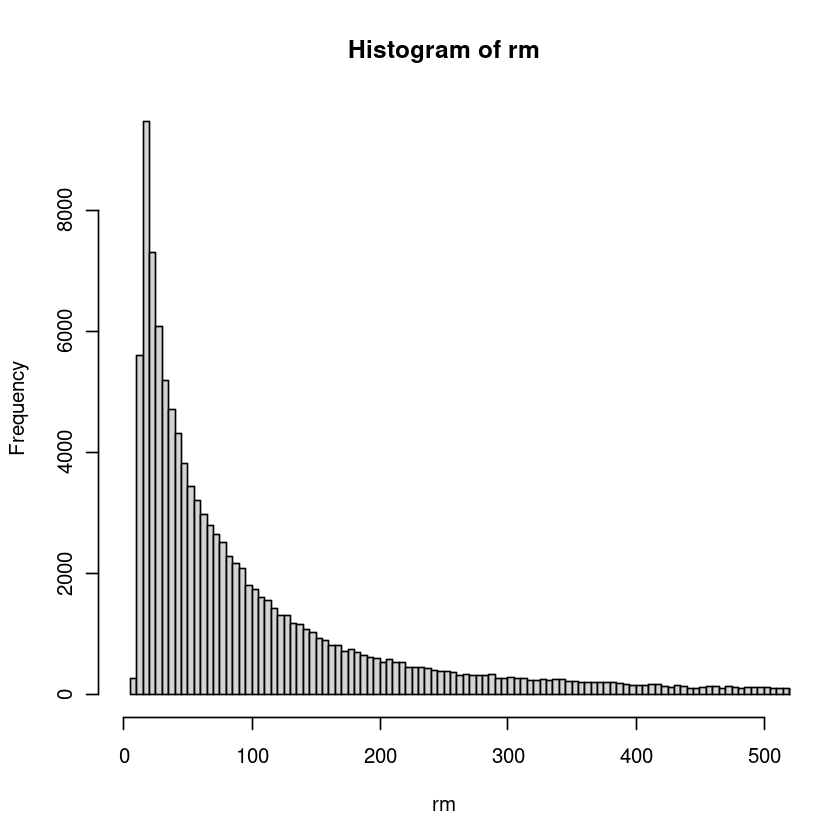

In [104]:
#Visualize count data row max for count threshold filtering
rm <- apply(countData[ , c(20:30) ], 1, max)
hist(rm, breaks = 1000, xlim = c(0,500))
s <- sum(rm<20)
# filter out peaks with few counts in all samples 
countData <- countData[rm >= 10, ]

# rearrange
rownames( countData ) <- countData[,1]  # countData$gene
origcolnames <- colnames(countData)
metadata <- countData[ , c(1:19) ]
countData <- countData[ , c(20:30) ]
colnames(countData) <- apply(as.data.frame(gsub(pattern="\\.\\.", replacement="|", colnames(countData))),1, function(X){ unlist(strsplit(X, "[|]"))[2]})
countData <- round(countData, 0)

# Prepare for deseq 
# first subset countData and condition to exclude the LL samples from analysis
LL_ind <- grep("low_low", condition)
condition = condition[-LL_ind]
countData = countData[, -LL_ind]

condition
head(countData)


In [107]:
ExpDesign <- data.frame(row.names=colnames(countData), condition = condition)
dds = DESeqDataSetFromMatrix(countData, colData=ExpDesign, design= ~ condition)



converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


[1] "S1"  "S2"  "S3"  "S4"  "S5"  "S9"  "S10" "S11"

In [108]:
# Run DESeq if not already saved
dds1 <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "S1"  "S2"  "S3"  "S4"  "S5"  "S9"  "S10" "S11"

Save or load dds

In [117]:
# saveRDS(dds1, file = "Tcf7_ATAC_full_dds_0LL.RDS")
dds1 <- readRDS("Tcf7_ATAC_full_dds_0LL.RDS")

dat1 = cbind(metadata, counts(dds1), round(counts(dds1, normalized=TRUE),1))


In [118]:
colnames(dat1)

[1] "PeakID..cmd.annotatePeaks.pl.Merged_PeakFile.txt.mm10..size.given..raw..d...S1....S2....S3....S4....S5....S6....S7....S8....S9....S10....S11.."
 [2] "Chr"                                                                                                                                           
 [3] "Start"                                                                                                                                         
 [4] "End"                                                                                                                                           
 [5] "Strand"                                                                                                                                        
 [6] "Peak.Score"                                                                                                                                    
 [7] "Focus.Ratio.Region.Size"                                                                                                                       
 [8] "Annotation"                                                                                                                                    
 [9] "Detailed.Annotation"                                                                                                                           
[10] "Distance.to.TSS"                                                                                                                               
[11] "Nearest.PromoterID"                                                                                                                            
[12] "Entrez.ID"                                                                                                                                     
[13] "Nearest.Unigene"                                                                                                                               
[14] "Nearest.Refseq"                                                                                                                                
[15] "Nearest.Ensembl"                                                                                                                               
[16] "Gene.Name"                                                                                                                                     
[17] "Gene.Alias"                                                                                                                                    
[18] "Gene.Description"                                                                                                                              
[19] "Gene.Type"                                                                                                                                     
[20] "S1"                                                                                                                                            
[21] "S2"                                                                                                                                            
[22] "S3"                                                                                                                                            
[23] "S4"                                                                                                                                            
[24] "S5"                                                                                                                                            
[25] "S9"                                                                                                                                            
[26] "S10"                                                                                                                                           
[27] "S11"                                                                                           

Comparison

In [119]:
pair1 <- c("low_hi",
           "low_hi", "hi_hi",
           "low_hi", "hi_hi",
           "low_hi", "hi_hi",
           "Naive", "Naive", "Ag")
pair2 <- c("hi_hi",
           "Naive", "Naive", 
           "Ag", "Ag",
           "D3", "D3", 
           "Ag", "D3", "D3")
condtable<- matrix(c(pair1, pair2), ncol = 2)

z= length(condtable[,1])

for (i in 1:z){
    print(i)

    label = paste(condtable[i,1], "_", condtable[i,2], sep="")
    print(label)
    res <-results(dds1, cooksCutoff= FALSE,contrast=c("condition",condtable[i,1],condtable[i,2]))
    res.m=as.data.frame(res)
    colnames(res.m) = paste (label,colnames(res.m),sep=".")
    dat1<-cbind(dat1,(res.m),apply(res,1,function(x) ifelse(abs(x[1])>2 & x[6]<0.05,1,0))) # Change x[6] to x[5] to use p value instead of adjusted p value (not correct to do!)
    colnames(dat1)[ncol(dat1)] <- paste0(colnames(dat1)[ncol(dat1)-1],"_pass_filter") # FDR < 0.05; FC > 2
}

# write.table(dat1,"Merged_PeakFile_annotate_DESEQ2_adjpvalue.txt", sep="\t", col.names=NA)

[1] 1
[1] "low_hi_hi_hi"
[1] 2
[1] "low_hi_Naive"
[1] 3
[1] "hi_hi_Naive"
[1] 4
[1] "low_hi_Ag"
[1] 5
[1] "hi_hi_Ag"
[1] 6
[1] "low_hi_D3"
[1] 7
[1] "hi_hi_D3"
[1] 8
[1] "Naive_Ag"
[1] 9
[1] "Naive_D3"
[1] 10
[1] "Ag_D3"


p value visualization

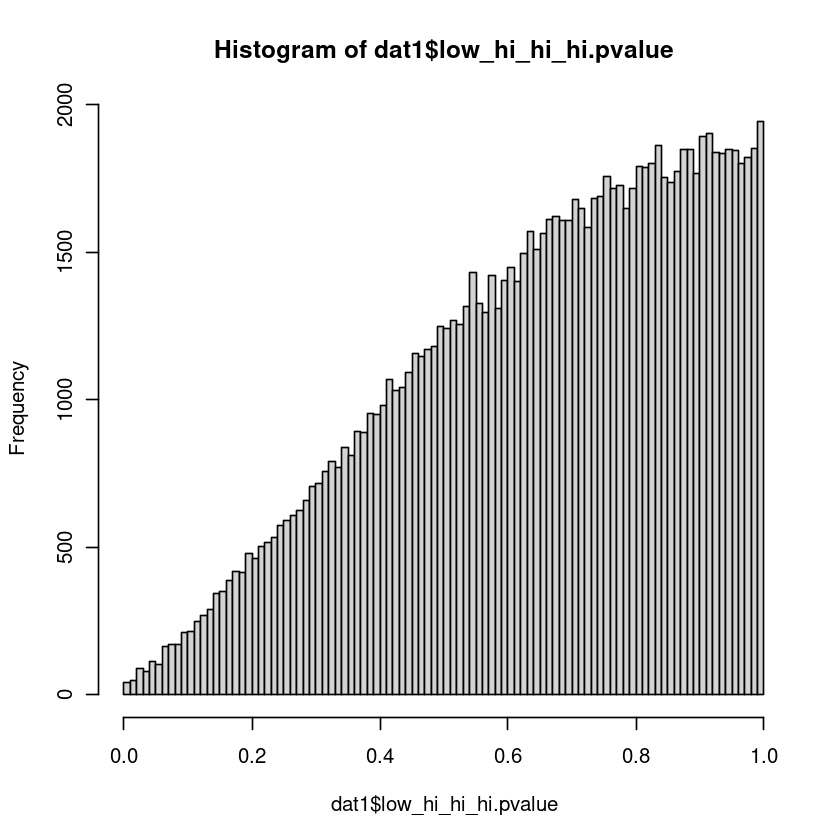

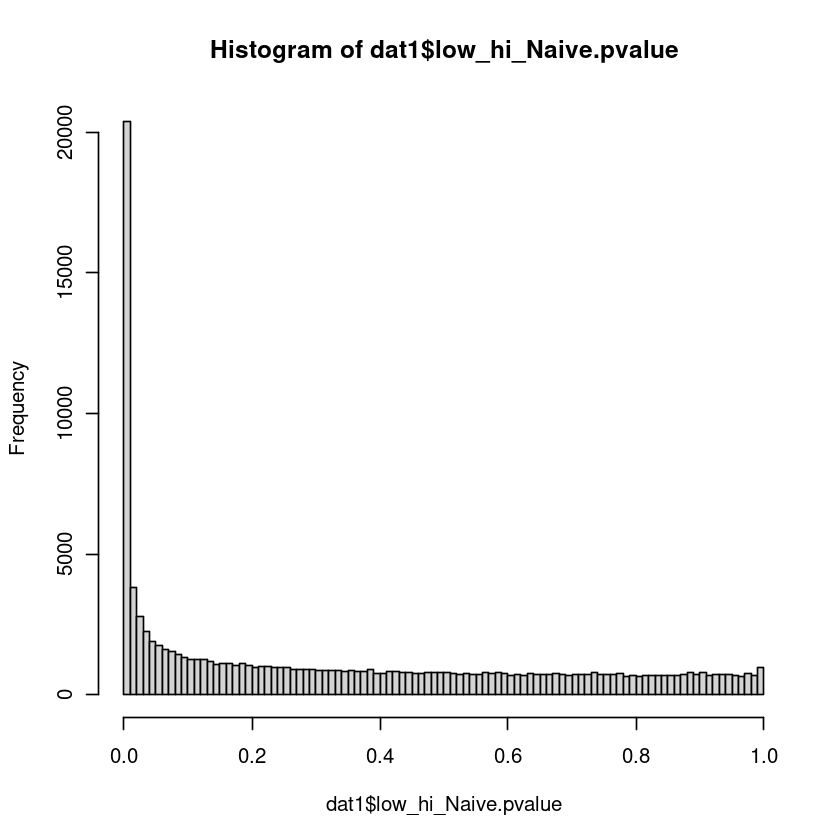

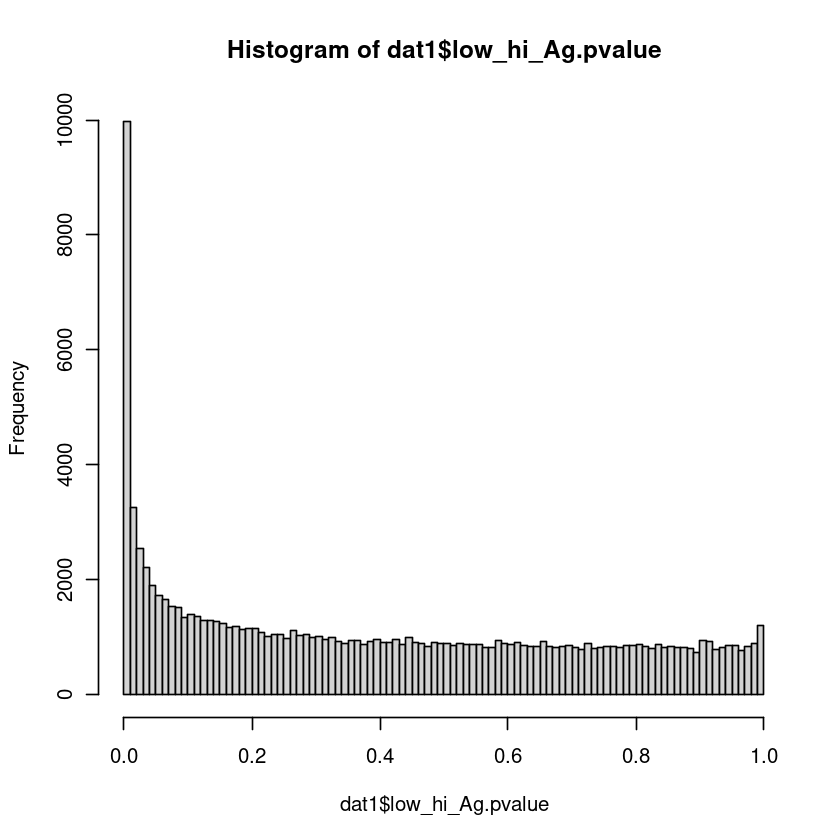

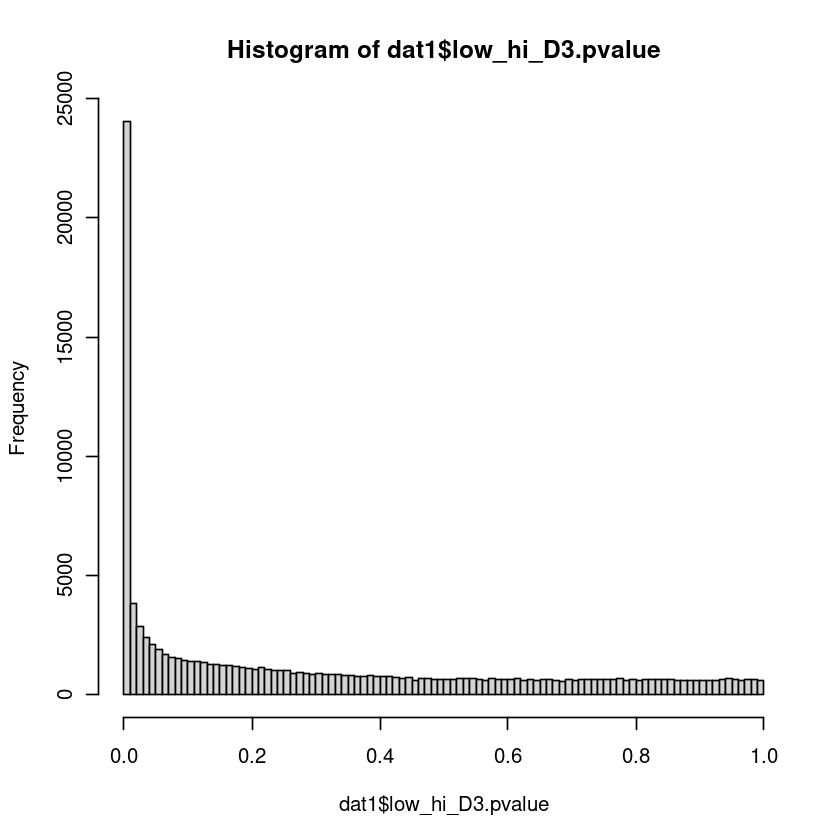

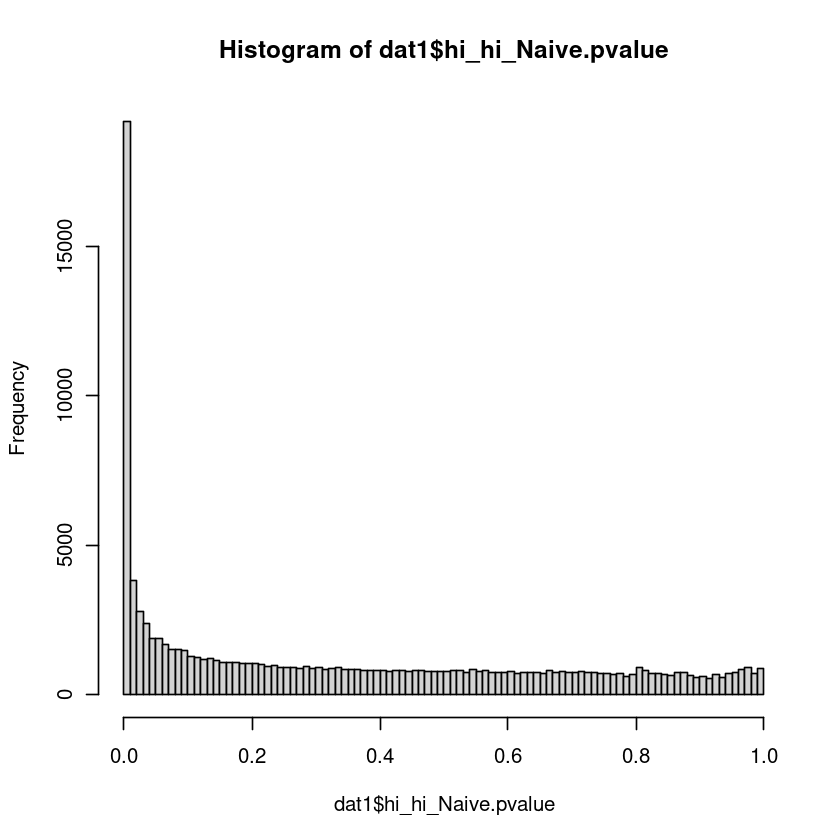

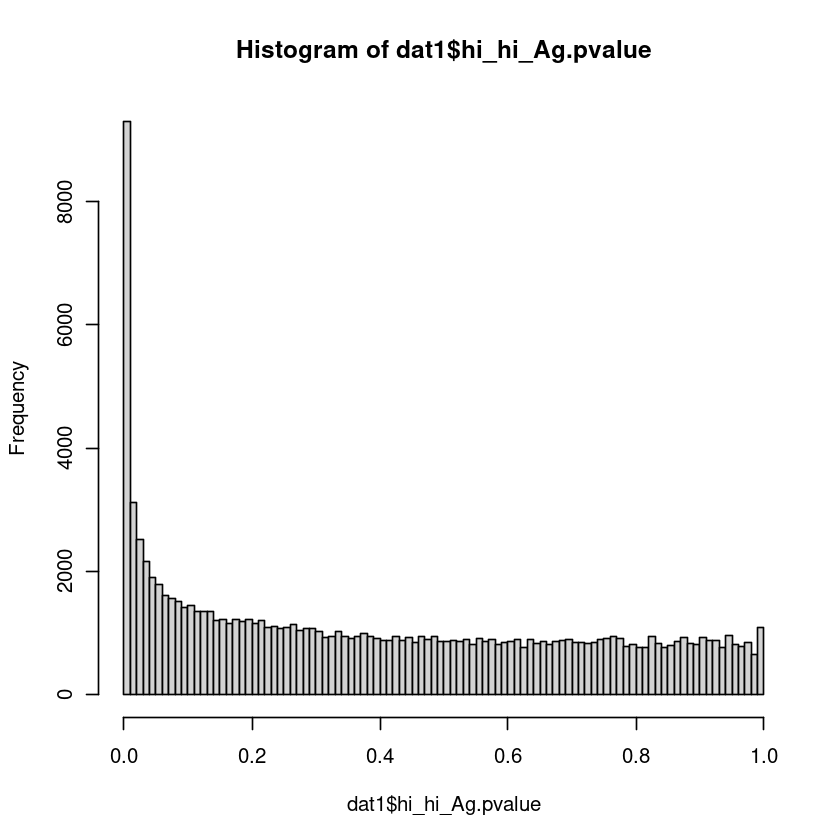

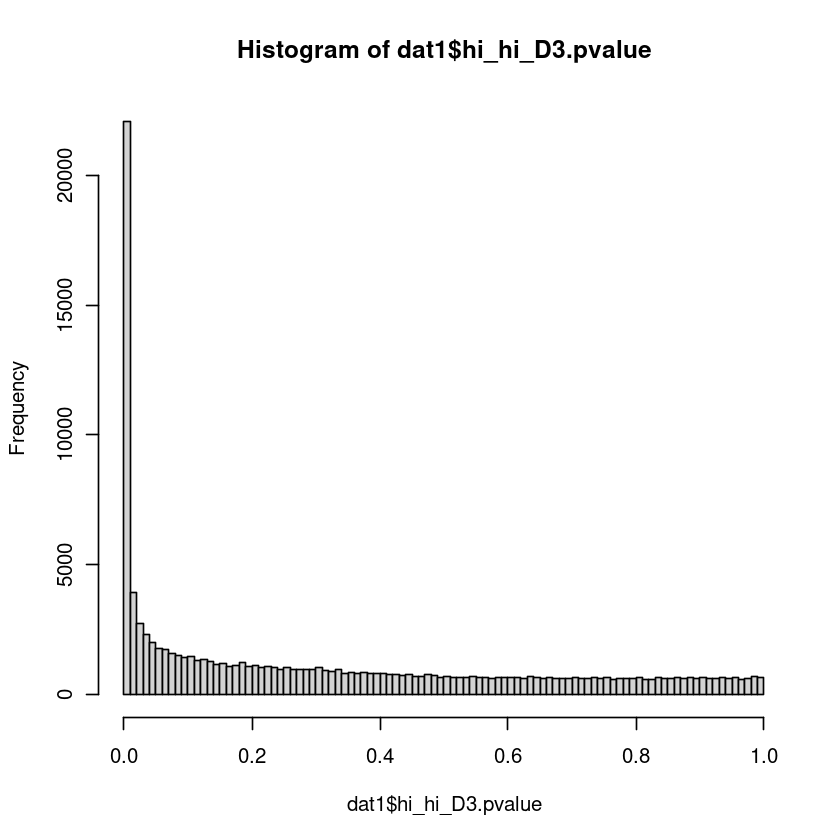

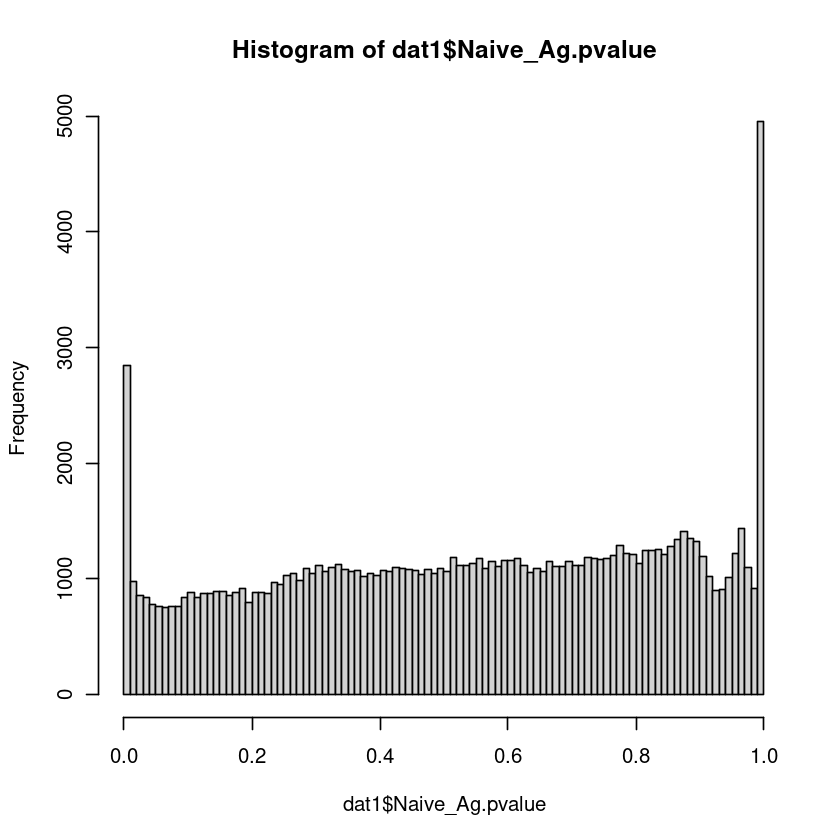

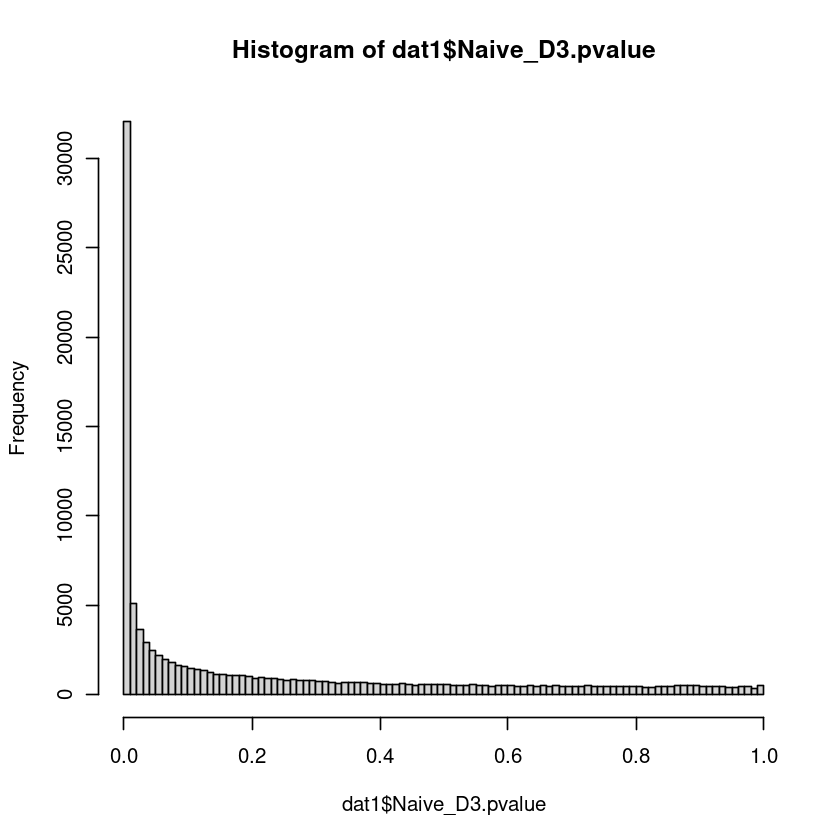

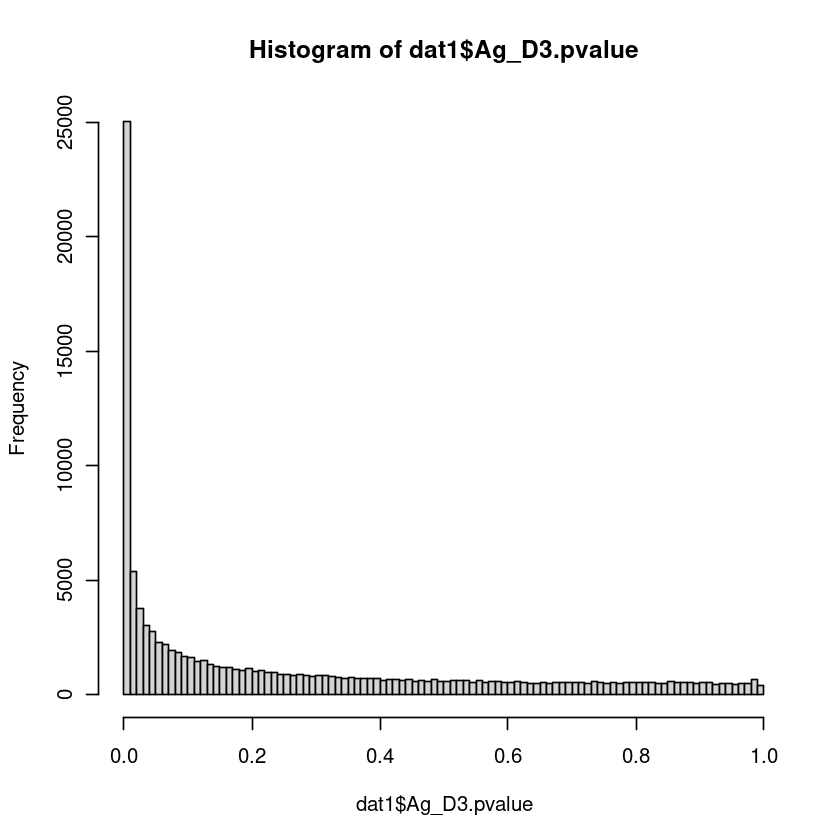

In [120]:
hist(dat1$low_hi_hi_hi.pvalue,breaks = 100)
hist(dat1$low_hi_Naive.pvalue,breaks = 100)
hist(dat1$low_hi_Ag.pvalue,breaks = 100)
hist(dat1$low_hi_D3.pvalue,breaks = 100)
hist(dat1$hi_hi_Naive.pvalue,breaks = 100)
hist(dat1$hi_hi_Ag.pvalue,breaks = 100)
hist(dat1$hi_hi_D3.pvalue,breaks = 100)
hist(dat1$Naive_Ag.pvalue,breaks = 100)
hist(dat1$Naive_D3.pvalue,breaks = 100)
hist(dat1$Ag_D3.pvalue,breaks = 100)

In [121]:
# Variable enh between LH and HH
dat1_LH_HH <- dat1[dat1$low_hi_hi_hi.padj_pass_filter ==1, ]
dds1_LH_HH <- dds1[dat1$low_hi_hi_hi.padj_pass_filter ==1, ]

# Aggregate variable enh between each D9 sample and each control
select <- unique(c(
which(dat1$low_hi_Naive.padj_pass_filter ==1),
which(dat1$low_hi_Ag.padj_pass_filter ==1),
which(dat1$low_hi_D3.padj_pass_filter ==1),
which(dat1$hi_hi_Naive.padj_pass_filter ==1),
which(dat1$hi_hi_Ag.padj_pass_filter ==1),
which(dat1$hi_hi_D3.padj_pass_filter ==1)))
dat1_D9_c <- dat1[select, ]
dds1_D9_c <- dds1[select, ]

In [182]:
dat1_LH_HH

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


PeakID..cmd.annotatePeaks.pl.Merged_PeakFile.txt.mm10..size.given..raw..d...S1....S2....S3....S4....S5....S6....S7....S8....S9....S10....S11..,Chr,Start,End,Strand,Peak.Score,Focus.Ratio.Region.Size,Annotation,Detailed.Annotation,Distance.to.TSS,⋯,Naive_D3.pvalue,Naive_D3.padj,Naive_D3.padj_pass_filter,Ag_D3.baseMean,Ag_D3.log2FoldChange,Ag_D3.lfcSE,Ag_D3.stat,Ag_D3.pvalue,Ag_D3.padj,Ag_D3.padj_pass_filter
<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Heatmap Visualization without separating promoter and enhancer peaks

In [123]:

# rlog
# rld_LH_HH <- rlog(dds1_LH_HH)
rld_D9_c <- rlog(dds1_D9_c)

# select data for heatmap
rld_hm <- rld_D9_c
dat1_hm <- dat1_D9_c
dds1_hm <- dds1_D9_c

# select most significant peaks by either p value or fold change
# get minimum of all tested p value
padj_cols <- grep("padj", colnames(dat1_hm))
padj_filt_cols <- grep("padj_pass_filter", colnames(dat1_hm))
padj_cols <- padj_cols[!(padj_cols %in% padj_filt_cols)]
dat1_hm$padj_min <- apply(dat1_hm[ , padj_cols], 1, min)
# take lowest n min adj p value
top_n <- head(order(dat1_hm$padj_min), n=500)
dat1_hm <- dat1_hm[top_n, ]
dds1_hm <- dds1_hm[top_n, ]
rld_hm <- rld_hm[top_n, ]

# heatmap matrix prep
mat <- assay(rld_hm)
rownames(mat) <- dat1_hm$Gene.Name
colnames(mat)<- condition
mat_scale <- t(scale(t(mat)))



-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



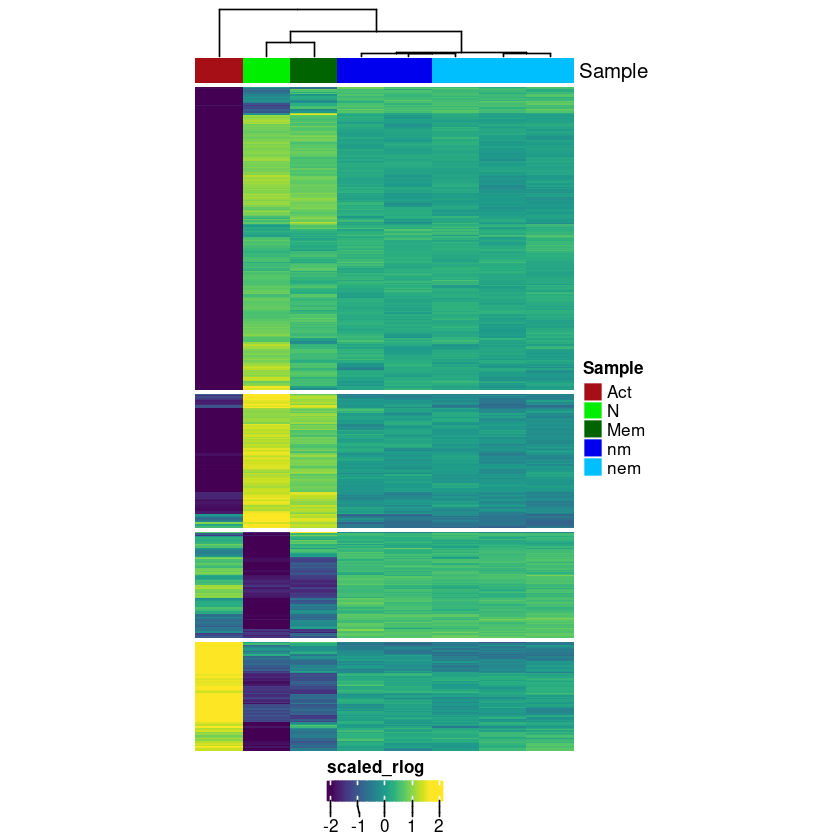

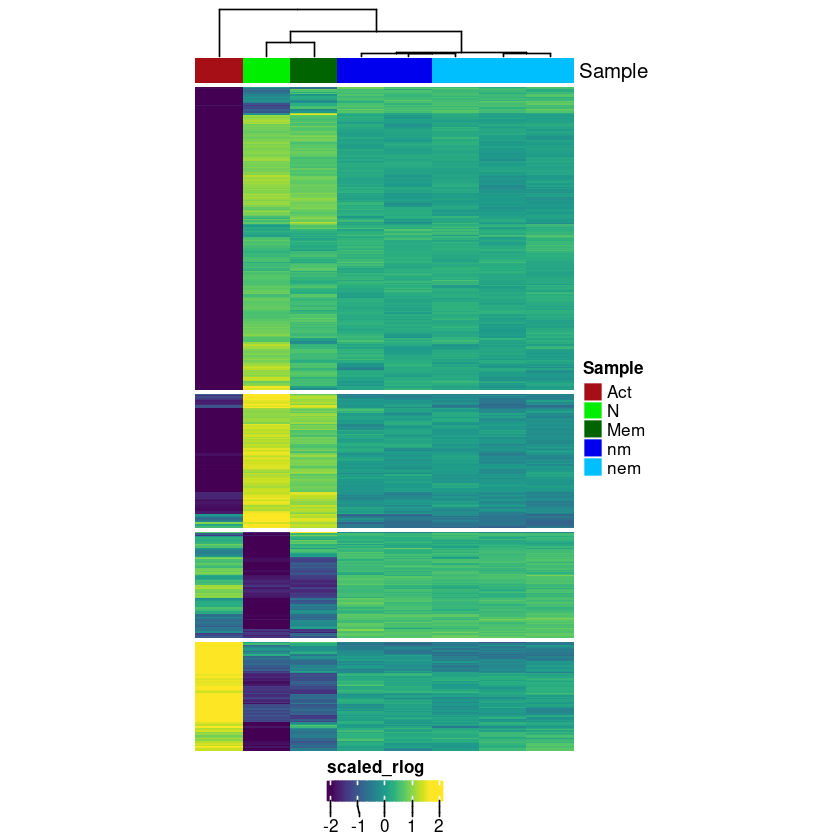

In [392]:
# genes to label (of interest)
g_fig <- c('Tcf7', 'Cxcr4', 'Zeb1', 'Zeb2', 'Tbx21', 'PmeI', 'Ifng', 'Tnfrsf8', 'Ccl5', 'Ccr7', 'Sell', 'Hif1a', 'Nfatc1', 'Lef1', 'Runx1', 'Cxcr5', 'Pdcd1', 'Havcr2', 'Il10', 'Ctla4', 'Smad7', 'Pou6f1', 'Il6ra')
genes_to_label_pos_1 <- which(rownames(mat_scale) %in% g_fig )
genes_to_label_1 <- rownames(mat_scale[genes_to_label_pos_1, ])  

# genes to label qstem pos
g_fig <- qstem_p
genes_to_label_pos_2 <- which(rownames(mat_scale) %in% g_fig )
genes_to_label_2 <- rownames(mat_scale[genes_to_label_pos_2, ])  

# genes to label qstem neg
g_fig <- qstem_n
genes_to_label_pos_3 <- which(rownames(mat_scale) %in% g_fig )
genes_to_label_3 <- rownames(mat_scale)[genes_to_label_pos_3]  

# genes to label Goldrath eff
g_fig <- EffvMem_UP
genes_to_label_pos_4 <- which(rownames(mat_scale) %in% g_fig )
genes_to_label_4 <- rownames(mat_scale[genes_to_label_pos_4, ])  

# genes to label Goldrath mem
g_fig <- EffvMem_DN
genes_to_label_pos_5 <- which(rownames(mat_scale) %in% g_fig )
genes_to_label_5 <- rownames(mat_scale[genes_to_label_pos_5, ])  

# genes to label Goldrath mem
g_fig <- SCMvEM_UP
genes_to_label_pos_6 <- which(rownames(mat_scale) %in% g_fig )
genes_to_label_6 <- rownames(mat_scale[genes_to_label_pos_6, ])  


# column sample name annotations
labels <- c('N', 'Mem', 'Act', 'nm', 'nm', 'nem', 'nem', 'nem')
labels <- factor(labels, levels = c('Act','N', 'Mem', 'nm','nem' ))
ann <- data.frame(labels)
colnames(ann) <- c('Sample')
colors_anno = list('Sample' = c('Act' = '#A50F15', 'N' = 'green2', 'Mem' = 'darkgreen', 'nem' = 'deepskyblue1', 'nm' = 'blue2'))
colAnn <- HeatmapAnnotation(df = ann, 
  which = 'col',
  col = colors_anno, 
  annotation_width = unit(c(1, 4), 'cm'),
  gap = unit(1, 'mm'),
  annotation_legend_param = list(Sample = list(direction = "horizontal")))


ha = rowAnnotation(
                   a4=anno_mark(at= genes_to_label_pos_4, labels = genes_to_label_4, which="row", labels_gp = gpar(col= "#A50F15",fontsize = 10)),
                   a5=anno_mark(at= genes_to_label_pos_5, labels = genes_to_label_5, which="row", labels_gp = gpar(col= "darkgreen",fontsize = 10)))
#                    a6=anno_mark(at= genes_to_label_pos_6, labels = genes_to_label_6, which="row", labels_gp = gpar(col= "blue",fontsize = 10)))

#k-means cluster the peaks
set.seed(123)
split = data.frame(cutree(hclust(dist(mat_scale)), k = 4))
split = split %>% dplyr::rename(clust = 1)
split$clust <- factor(split$clust, levels = c(1,4,2,3))


# Complex heatmap

ht_list = Heatmap(mat_scale,
    col = colorRamp2(seq(from=-2, to=2, by = (2--2)/12)[1:12], viridis::viridis(12)),
    name = "scaled_rlog", 
    show_column_names = FALSE, # false when using column annotation instead 
    show_row_names = FALSE, 
    row_names_gp = gpar(fontsize = 4), 
    cluster_columns = TRUE, 
    column_dend_reorder = c(3,5,1,8,8,10,10,10), # weights for reordering dendrogram
    cluster_rows = TRUE, 
    show_column_dend = TRUE, 
    show_row_dend = FALSE,
    width = unit(8, "cm"),
    clustering_method_rows = "complete",
#     clustering_method_rows = "ward.D2",
    
#     # split by dendrogram              
#     row_split = 4,
#     cluster_row_slices = TRUE,
#     row_dend_reorder = TRUE,
                  
    # split by kmeans
    cluster_row_slices = FALSE, # manual ordering          
    row_split = split,  
    
    # remove row cluster annotations
    row_title = NULL,    
    
    # annotation
#     right_annotation = ha,
    top_annotation = colAnn,
        
    # horizontal legend
    heatmap_legend_param = list(direction = "horizontal")
    
)

ht_list = draw(ht_list, annotation_legend_side="right", heatmap_legend_side = "bottom")




In [393]:
# Save
pdf("ATAC_D9_hm_clustering-complete_adj-p_n500_enh-prom_kmeans_4_0genes.pdf", width=8, height=12)
draw(ht_list)
dev.off()

png 
  2

PCA

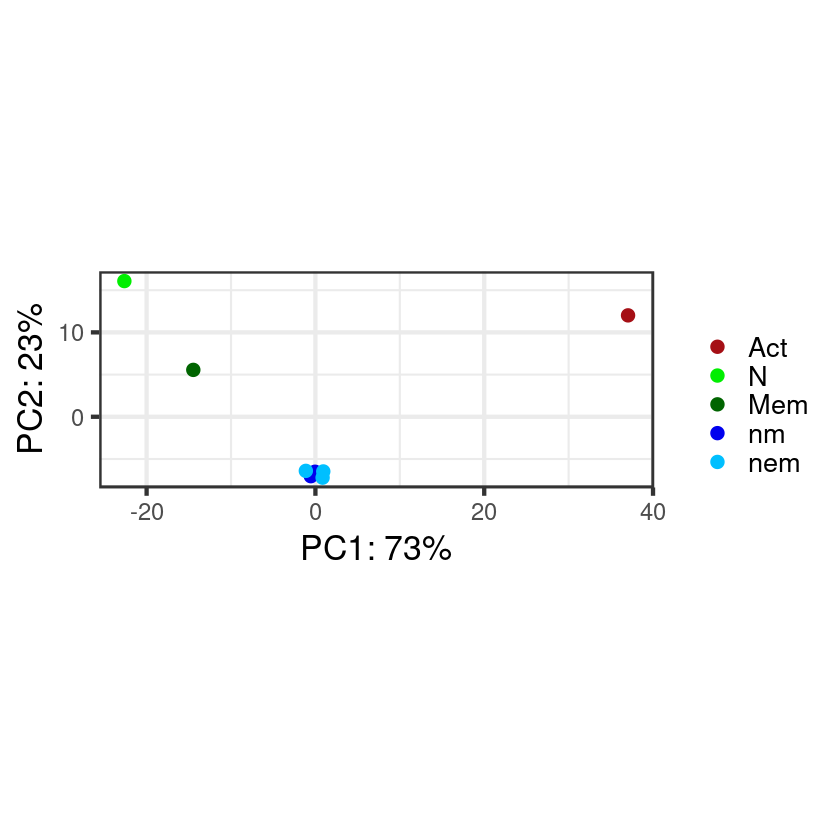

In [396]:
# make condition factor with levels for proper plotting order
labels <- c('N', 'Mem', 'Act', 'nm', 'nm', 'nem', 'nem', 'nem')
rld_hm$condition <-  factor(rld_hm$condition, levels = c("D3", "Naive", "Ag", "hi_hi", "low_hi"))

# colors 
cols <-  c("#A50F15", "green2", "darkgreen", "blue2", "deepskyblue1")

# PCA using top 500 DEG with padj <.05 between controls and D9
pcaData <- plotPCA(rld_hm, intgroup=c("condition"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
g <- ggplot(pcaData, aes(PC1, PC2, color=condition)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"%")) +
  ylab(paste0("PC2: ",percentVar[2],"%")) + 
  coord_fixed() + scale_color_manual("",labels=c('Act', 'N', 'Mem', 'nm', 'nem'), values = cols) +
theme_bw(base_size=20) + theme(axis.text=element_text(size=14))

g
save_plot(g, file = "ATAC_pca_D9_c_0LL.pdf")

Correlation map as alternative to PCA

In [178]:
mat_dist$condition



[1] Naive  Ag     D3     hi_hi  hi_hi  low_hi low_hi low_hi
Levels: D3 Naive Ag hi_hi low_hi

png 
  2

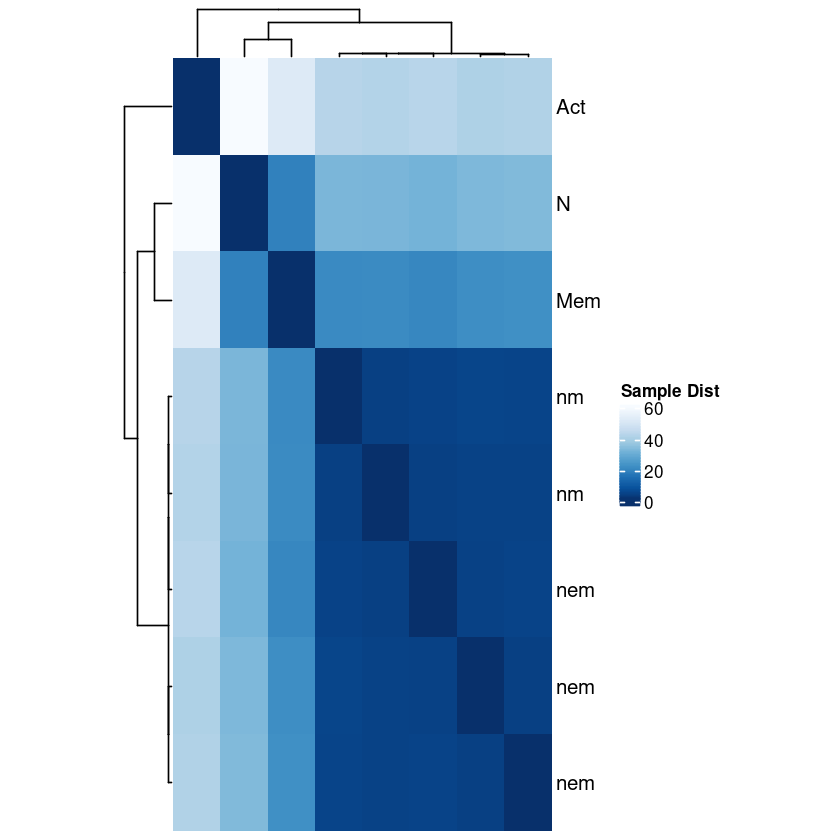

In [386]:
# choose matrix for sample distance plot
mat_dist <- rld_hm
mat_dist$cond_label <- c('N', 'Mem', 'Act', 'nm', 'nm', 'nem', 'nem', 'nem')

sampleDists <- dist(t(assay(mat_dist)))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(mat_dist$cond_label, mat_dist$type)
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)

ht_corr = Heatmap(sampleDistMatrix, 
    name = "Sample Dist",
    show_column_names = FALSE, 
    show_row_names = TRUE, 
    # row_names_gp = gpar(fontsize = 2), 
    cluster_columns = TRUE, 
    column_dend_reorder = c(3,5,1,8,8,10,10,10), # weights for reordering dendrogram
    cluster_rows = TRUE, 
    row_dend_reorder = c(3,5,1,8,8,10,10,10), # weights for reordering dendrogram
    show_column_dend = TRUE, show_row_dend = TRUE,width = unit(8, "cm"),
    col = colors
)
ht_corr = draw(ht_corr)

pdf("ATAC_corr-matrix.pdf", width=6, height=4)
ht_corr
dev.off()

Get genomic coordinates of DE peaks of genes of interest for visualization

In [186]:
dat1_D9_c[which(dat1_D9_c$Gene.Name == "Gzmb"), ]

,PeakID..cmd.annotatePeaks.pl.Merged_PeakFile.txt.mm10..size.given..raw..d...S1....S2....S3....S4....S5....S6....S7....S8....S9....S10....S11..,Chr,Start,End,Strand,Peak.Score,Focus.Ratio.Region.Size,Annotation,Detailed.Annotation,Distance.to.TSS,⋯,Naive_D3.pvalue,Naive_D3.padj,Naive_D3.padj_pass_filter,Ag_D3.baseMean,Ag_D3.log2FoldChange,Ag_D3.lfcSE,Ag_D3.stat,Ag_D3.pvalue,Ag_D3.padj,Ag_D3.padj_pass_filter
,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Merged-chr14-56284602-11,Merged-chr14-56284602-11,chr14,56284494,56284692,+,48.60909,./S1/peaks.txt|./S2/peaks.txt|./S3/peaks.txt|./S4/peaks.txt|./S5/peaks.txt|./S6/peaks.txt|./S7/peaks.txt|./S8/peaks.txt|./S9/peaks.txt|./S10/peaks.txt|./S11/peaks.txt,Intergenic,Intergenic,-22259,⋯,9.588659e-02,1.960071e-01,0,168.84543,0.6101722,0.2893266,2.108939,3.494986e-02,1.072693e-01,0
Merged-chr14-56262327-11,Merged-chr14-56262327-11,chr14,56262205,56262439,+,46.23636,./S1/peaks.txt|./S2/peaks.txt|./S3/peaks.txt|./S4/peaks.txt|./S5/peaks.txt|./S6/peaks.txt|./S7/peaks.txt|./S8/peaks.txt|./S9/peaks.txt|./S10/peaks.txt|./S11/peaks.txt,promoter-TSS (NM_013542),promoter-TSS (NM_013542),12,⋯,2.366017e-08,7.059509e-07,1,177.11838,-1.2734279,0.3155402,-4.035707,5.443811e-05,8.067527e-04,1
Merged-chr14-56287985-10,Merged-chr14-56287985-10,chr14,56287846,56288099,+,25.79900,./S1/peaks.txt|./S2/peaks.txt|./S4/peaks.txt|./S5/peaks.txt|./S6/peaks.txt|./S7/peaks.txt|./S8/peaks.txt|./S9/peaks.txt|./S10/peaks.txt|./S11/peaks.txt,Intergenic,Intergenic,-25638,⋯,3.100242e-04,2.118688e-03,1,103.62193,-0.4343075,0.3898377,-1.114072,2.652481e-01,4.317834e-01,0
Merged-chr14-56276119-11,Merged-chr14-56276119-11,chr14,56276001,56276393,+,22.06364,./S1/peaks.txt|./S2/peaks.txt|./S3/peaks.txt|./S4/peaks.txt|./S5/peaks.txt|./S6/peaks.txt|./S7/peaks.txt|./S8/peaks.txt|./S9/peaks.txt|./S10/peaks.txt|./S11/peaks.txt,Intergenic,Intergenic,-13863,⋯,1.548570e-02,4.925888e-02,1,119.03969,-0.9011600,0.3594275,-2.507209,1.216886e-02,5.037387e-02,0
Merged-chr14-56266317-3,Merged-chr14-56266317-3,chr14,56266183,56266473,+,18.86667,./S4/peaks.txt|./S5/peaks.txt|./S7/peaks.txt,Intergenic,Intergenic,-3994,⋯,5.325465e-06,7.379705e-05,1,62.84207,-1.4744639,0.6153684,-2.396067,1.657206e-02,6.297291e-02,0
Merged-chr14-56283971-1,Merged-chr14-56283971-1,chr14,56283896,56284046,+,8.53000,./S1/peaks.txt,Intergenic,Intergenic,-21637,⋯,1.555696e-01,2.781685e-01,0,41.25161,-1.0833249,0.6270886,-1.727547,8.406953e-02,1.959575e-01,0
Merged-chr14-56281752-1,Merged-chr14-56281752-1,chr14,56281677,56281827,+,32.00000,./S3/peaks.txt,Intergenic,Intergenic,-19418,⋯,3.095825e-07,6.564693e-06,1,34.43631,-3.7179158,0.7523267,-4.941890,7.736883e-07,2.258096e-05,1
Merged-chr14-56296626-1,Merged-chr14-56296626-1,chr14,56296551,56296701,+,25.90000,./S3/peaks.txt,Intergenic,Intergenic,-34292,⋯,1.129802e-03,6.065419e-03,1,46.64418,-1.6821503,0.5321305,-3.161161,1.571416e-03,1.108941e-02,1
Merged-chr14-56291460-1,Merged-chr14-56291460-1,chr14,56291385,56291535,+,22.60000,./S3/peaks.txt,Intergenic,Lx6|LINE|L1,-29126,⋯,1.751076e-05,1.993445e-04,1,14.64495,-3.5024788,1.0567437,-3.314407,9.183771e-04,7.369103e-03,1


In [190]:
# TFs from sci dataset
TF_Tcell <- str_to_title(c('JUNB', 'MYC', 'TBX21', 'IRF4', 'EGR1', 'NFATC1', 'BMYC', 'MXI1', 'STAT5A', 'NFAT5', 'ELK3', 'EOMES', 'REL', 'BHLHE40', 'STAT3', 'RUNX2', 'FOXO3', 'MXD4', 'BCL11B', 'CUX1', 'GTF2I', 'FOXO1', 'FLI1', 'STAT1', 'CHD2', 'ZEB1', 'FOXN3', 'TCF7', 'LEF1', 'ELF1', 'MYB', 'IKZF1', 'TCF12'))
# additional goi
goi <- c('Tcf7', 'Cxcr4', 'Zeb1', 'Zeb2', 'Tbx21', 'PmeI', 'Ifng', 'Tnfrsf8', 'Ccl5', 'Ccr7', 'Sell', 'Hif1a', 'Nfatc1', 'Lef1', 'Runx1', 'Cxcr5', 'Pdcd1', 'Havcr2', 'Il10', 'Ctla4', 'Smad7', 'Pou6f1', 'Il6ra',
         'Tbx21', 'Il7r', 'Eomes',
         'Cx3cr1', 'Klrg1', 'Bach2', 'Gzmb', 'Prf1',
         'Klrc1', 'Klrc2', 'Klrk1') # From RNA DE
goi <- unique(c(TF_Tcell, goi))
dat1_goi <- dat1_D9_c[which(dat1_D9_c$Gene.Name %in% goi), ]

# generate combined chr start end column
dat1_goi_info <- dat1_goi %>% dplyr::select(Gene.Name, Chr, Start, End, Distance.to.TSS) %>%
  unite("chr_start", Chr,Start, sep = c("-"), remove = FALSE) %>%
  unite("loc", chr_start,End, sep = c("-"), remove = FALSE) %>% dplyr::select(!chr_start) 


# label as promoter or enhancer based on distance to TSS
dat1_goi_info$cat <- "none"
dat1_goi_info[which(abs(dat1_goi_info$Distance.to.TSS) <500, ), ]$cat <- "prom"
dat1_goi_info[which(abs(dat1_goi_info$Distance.to.TSS) >=500, ), ]$cat <- "enh"

# # concatenate with normalized counts
# norm_counts <- dat1_D9_c[which(dat1_D9_c$Gene.Name %in% goi), 31:41 ]
# dat1_goi_info <- cbind(dat1_goi_info, norm_counts)

# # add log2FC 
# log2fc <- norm_counts %>% rowwise() %>% summarize(log2fc = log2(max(c(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11))/(min(c(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11))+.1)))
# dat1_goi_info$log2fc <- log2fc$log2fc


# sum(dat1_goi_info$cat == "prom")
# sum(dat1_goi_info$cat == "enh")

In [191]:
head(dat1_goi_info)

,Gene.Name,loc,Chr,Start,End,Distance.to.TSS,cat
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
Merged-chr5-34187924-11,Mxd4,chr5-34187799-34188014,chr5,34187799,34188014,-196,prom
Merged-chr7-73537887-11,Chd2,chr7-73537805-73538001,chr7,73537805,73538001,3843,enh
Merged-chr10-42277796-11,Foxo3,chr10-42277712-42277904,chr10,42277712,42277904,-1066,enh
Merged-chr11-100939676-11,Stat3,chr11-100939492-100939806,chr11,100939492,100939806,-109,prom
Merged-chr4-32248444-1,Bach2,chr4-32248369-32248519,chr4,32248369,32248519,-168991,enh
Merged-chr1-52113854-11,Stat1,chr1-52113759-52113940,chr1,52113759,52113940,-5589,enh


In [192]:
write_csv(dat1_goi_info, file = "ATAC_DE_peak_goi_info.csv")